<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

# Reconocimiento de patrones. Parte II.

# Ejemplo de clasificación *multiclase*. Base de datos *Dermatology*.

## Visualización de la frontera entre clases.


Este *Notebook* contiene el trabajo necesario para cargar el fichero *.csv* de la base de datos de **Kaggle** denominada *Dermatology*.

## Autor
- Pedro Latorre Carmona

## Curso 2024-2025

**Kaggle** es, digamos, un repositorio, donde podemos encontrar bases de datos, así como diferentes tipos de métodos (código), para tareas que pueden ir desde la clasificación, regresión, por citar sólo dos ejemplos:

https://www.kaggle.com/

Dentro de **Kaggle**, vamos a trabajar con la base de datos *Dermatology*. Las características de la base de datos y su descarga, se pueden encontrar en:

https://www.kaggle.com/code/jayrdixit/dermatology-dataset

La idea de esta práctica es poder crear una base de datos que permita establecer el subtipo dentro de la enfermedad denominada *dermatosis eritematoescamosa*.

Estamos hablando, en concreto, de un problema de $6$ clases, donde las clases están numeradas, del $1$ al $6$. 

Tened en cuenta:

- Hay 34 atributos (características).

- La clase corresponde a la última columna, i. e., *label*.

- *Echad un vistazo* por si hubiera datos **no válidos**.

---
## Objetivos

Los objetivos a cubrir dentro de este problema de clasificación, son dos:

1. Obtener la tasa de acierto para este problema de $6$ clases.


2. Conseguir crear una representación adecuada en 2D que permita ver la *frontera de separación* entre al menos dos de las clases. Para ello, tenéis que elegir: (a) Dos características a representar; (b) Al menos, dos clases a visualizar.

Podéis echar un vistazo a:

https://medium.com/@arvaadwitya/knn-visualization-using-matplotlib-and-numpy-e5ac36f035d3

---


# Carga de la base de datos y aplicación de los métodos de clasificación


In [1]:
'''
Importación de librerías
'''
import pandas as pd
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
'''
Datos
'''
path = "./Dermatology"

features_file = os.path.join(path, "dermatology_database_1.csv")

In [3]:
# Load the features dataset
df = pd.read_csv(features_file)

In [4]:
display(df)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,label
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


In [5]:
# Eliminación de las filas que contengan valores "N. A."

df=df.dropna()

In [6]:
display(df)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,label
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


In [7]:
y = df.label.values.astype(int)


caract_cols = [col for col in df.columns if col != 'label']

X_all = df[caract_cols].values

In [8]:
print(X_all.shape)

(358, 34)


In [9]:
'''
List of datasets and their names included in the experimental study
'''

datasets = [(X_all,y)]
dataset_names = ["Data All"]

In [10]:
print(y.shape)

(358,)


In [11]:
print(X_all)

[[ 2.  2.  0. ...  1.  0. 55.]
 [ 3.  3.  3. ...  1.  0.  8.]
 [ 2.  1.  2. ...  2.  3. 26.]
 ...
 [ 3.  2.  2. ...  2.  3. 28.]
 [ 2.  1.  3. ...  2.  3. 50.]
 [ 3.  2.  2. ...  3.  0. 35.]]


In [12]:
print(y)

[2 1 3 1 3 2 5 3 4 4 1 2 2 1 3 4 2 1 3 5 6 2 5 3 5 1 6 5 2 3 1 2 1 2 3 1 2
 4 1 2 5 3 4 6 2 3 3 4 1 1 5 1 2 3 4 2 6 1 5 1 2 3 1 4 5 1 2 6 3 5 4 2 2 1
 3 5 1 2 2 2 5 1 1 3 1 4 2 2 5 1 3 4 2 5 1 6 2 5 1 2 2 1 4 1 3 1 1 3 5 3 3
 5 2 3 4 1 2 5 6 1 1 2 6 3 5 4 1 1 3 5 5 1 4 2 3 1 2 1 1 3 3 3 2 5 4 2 2 1
 1 1 5 3 2 3 2 2 4 2 3 6 2 1 1 3 4 3 3 1 1 1 3 1 1 2 3 3 1 1 1 1 6 2 2 2 2
 1 3 3 3 1 1 2 3 2 2 2 5 5 5 5 5 1 1 1 1 1 1 1 3 3 3 3 3 3 4 4 4 4 5 5 5 5
 5 5 5 2 2 2 2 1 1 1 1 1 1 6 6 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 4 4 4 4 4 4 6
 6 6 4 4 4 1 1 1 1 1 2 2 4 4 4 1 1 2 2 2 3 3 3 3 1 1 1 1 5 5 5 5 5 3 3 3 4
 1 1 4 4 4 1 1 1 3 3 3 3 3 1 1 1 1 4 4 1 1 4 3 3 4 1 1 4 4 5 5 1 1 5 5 3 1
 5 5 6 6 4 4 6 6 6 1 1 1 5 5 1 1 1 1 2 2 4 4 3 3 1]


In [13]:
'''
Definition of the SVM parameter search
'''
C_range = np.logspace(-5, 5, 15)
gamma_range = np.logspace(-5, 5, 15)
param_grid_svm = dict(gamma=gamma_range, C=C_range)
nested_cv = 5

grid_svm = GridSearchCV(SVC(), param_grid=param_grid_svm, cv=nested_cv, n_jobs=-1)

In [14]:
# Show the range of values to be explored
C_range,gamma_range

(array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
        7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
        5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
        3.72759372e+03, 1.93069773e+04, 1.00000000e+05]),
 array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
        7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
        5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
        3.72759372e+03, 1.93069773e+04, 1.00000000e+05]))

In [15]:
'''
Definition of the MLP parameter search
'''
alpha_range = np.logspace(-5, -1, 5)
hidden_layer_sizes_range=[(50,),(100,),(200,),(500,),(1000,)]

param_grid_mlp = dict(alpha=alpha_range, hidden_layer_sizes=hidden_layer_sizes_range)


grid_mlp = GridSearchCV(MLPClassifier(max_iter=1000,
                                      early_stopping=True), param_grid=param_grid_mlp, cv=nested_cv)

In [16]:
'''
List of classifiers and their names included in the experimental study
'''

cls_names = ["SVM","MLP"]

classifiers = [
    make_pipeline(StandardScaler(), grid_svm),
    make_pipeline(StandardScaler(), grid_mlp)]

In [17]:
# Method that runs the classifiers and returns the labels give for the test set

from sklearn.model_selection import train_test_split

def predictions(model,X_train,y_train,X_test,y_test):    
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    return y_test, y_pred

In [18]:
def predictions_model(X_train,y_train,X_test, y_test,model):
        '''
        Predictions with a model and a dataset (X and y), to later obtain the measurements 
        you want
        
        Parameters
        ----------
        X: numpy.array
            Dataset (features)
        Y: numpy.array
            Dataset (Target)
        model: scikit_model
            model to be trained
        num_folds: int
            number of folds in the cross validation
        
        Return
        -------
        array 
            array of prediccions obtained using cross_validation
        '''
        print('\t'+str(model)[:20], end=' - ')
        y_test,preds = predictions(model,X_train,y_train,X_test,y_test)
        print('OK')
        
        return y_test,preds

In [19]:
from sklearn.model_selection import train_test_split

def run_all_save(filename):
    '''
    Perform cross validation with all models and datasets.
        
        
    Parameters
    ----------
    num_folds: int
        number of folds in the cross validation
    filename: string
        name of the file that stores the predictions obtained using crossvalidation
        
        
    El par X_train, y_train son los atributos y clases del conjunto de entrenamiento (70% de los ejemplos)
    El par X_test, y_test son los atributos y clases del conjunto de test (30% de los ejemplos)

    stratify (estratificar) significa que se quiere que haya la misma proporcion de cada una de las clases
    tanto en entrenamiento como en test, es decir, no es una partición completamente aleatoria.
    
    ''' 
    
    all_preds = {}

    for dataset,dataset_name in zip(datasets, dataset_names):
        print(dataset_name)
        X,y = dataset
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

        for model,cls_name in zip(classifiers,cls_names):
            print(cls_name)
            y_test,preds = predictions_model(X_train,y_train,X_test,y_test,model)
            all_preds[(dataset_name,cls_name)]=(y_test,preds)

    all_preds["cls_names"]=cls_names
    all_preds["dataset_names"]=dataset_names

    with open(filename, 'wb') as fp:
         pickle.dump(all_preds, fp)   

In [20]:
'''
All the predictions are going to be saved in a Python dictionary for 
further analysis.
'''

filename = 'predicciones.obj'

In [21]:
# Run the experiments

run_all_save(filename)

Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK


# Exploring the results

If the experiments have been done previously, you only need to execute from this part.

The results are going to be loaded from the hard disk

In [22]:
import pickle
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

In [23]:
def evalua(y_test, y_pred):
    # completa aqui
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred)
    

In [24]:
def conf_mat_df(cm,labels):
    '''
    Create a confusion matrix in a DataFrame
        
        
    Parameters
    ----------
    cm: ndarray 2D
        confusion matrix
    labels: list
        List of class names
        
    Return DataFrame
    -------
    
    ''' 

    return (pd.DataFrame(cm,index=labels, columns=labels)
          .rename_axis("actual")
          .rename_axis("predicted", axis=1))

In [25]:
def get_results(filename):
    '''
    Load the file with the predictions.
    Compute accuracy, confusion matrix and other measures.
        
        
    Parameters
    ----------
    filename: string
        name of the file that stores the predictions obtained using crossvalidation
        
    Return
    dictionary
        A dictionary of key:values that asociates the name
        of a measure or chart with the value
    -------
    
    ''' 

    with open(filename, 'rb') as fp:
        all_preds = pickle.load(fp)

    cls_names = all_preds.pop("cls_names")
    dataset_names = all_preds.pop("dataset_names")

    data_cls_pairs = list(all_preds.keys())
    data_cls_pairs.sort()

    results = {}


    acc_df = pd.DataFrame(index=dataset_names, columns=cls_names)

    ## A DataFrame is created to store the accuracy in each clase
    for dataset in dataset_names:
        results[(dataset,"acc")] = pd.DataFrame(columns=cls_names)


    for dataset_name,cls_name in data_cls_pairs:

        #print(dataset_name,cls_name)
        y_true, y_pred = all_preds[(dataset_name,cls_name)]
        labels = list(np.unique(y_true))

        acc = evalua(y_true, y_pred)
        # Fill accuracy dataframe
        acc_df.at[dataset_name,cls_name]=acc

        # Get conf_mat
        cm = confusion_matrix(y_true, y_pred)
        cm_df = conf_mat_df(cm,labels)
        results[(dataset_name,cls_name,"cm")] = cm_df
        
        # Get classification report
        report = classification_report(y_true, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        results[(dataset_name,cls_name,"report")] = report_df

        # Acc per class
        cm_dig = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_dig = cm_dig.diagonal()

        dfi = results[(dataset_name,"acc")]
        dfi[cls_name]=pd.Series(cm_dig,labels)    
        results[(dataset_name,"acc")]=dfi.copy()


    results["Acc"] = acc_df
    return results
        
        
results = get_results(filename)

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        34
           2       0.93      0.72      0.81        18
           3       1.00      1.00      1.00        21
           4       0.87      0.87      0.87        15
           5       0.88      1.00      0.93        14
           6       1.00      1.00      1.00         6

    accuracy                           0.94       108
   macro avg       0.94      0.93      0.93       108
weighted avg       0.94      0.94      0.93       108

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       1.00      0.83      0.91        18
           3       1.00      1.00      1.00        21
           4       0.83      1.00      0.91        15
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         6

    accuracy                           0.97       108
   macro avg       0.97

In [26]:
df_total = results["Acc"].astype(float)
df_conf = results[("Data All","SVM","cm")].astype(float)
df_report = results[("Data All","SVM","report")].astype(float)

In [27]:
df_total

,SVM,MLP
Data All,0.972222,0.935185


In [28]:
df_conf

predicted,1,2,3,4,5,6
actual,,,,,,
1,34.0,0.0,0.0,0.0,0.0,0.0
2,0.0,15.0,0.0,3.0,0.0,0.0
3,0.0,0.0,21.0,0.0,0.0,0.0
4,0.0,0.0,0.0,15.0,0.0,0.0
5,0.0,0.0,0.0,0.0,14.0,0.0
6,0.0,0.0,0.0,0.0,0.0,6.0


In [29]:
df_report.round(4)[["precision","recall","f1-score"]]

,precision,recall,f1-score
1,1.0000,1.0000,1.0000
2,1.0000,0.8333,0.9091
3,1.0000,1.0000,1.0000
4,0.8333,1.0000,0.9091
5,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000
accuracy,0.9722,0.9722,0.9722
macro avg,0.9722,0.9722,0.9697
weighted avg,0.9769,0.9722,0.9722


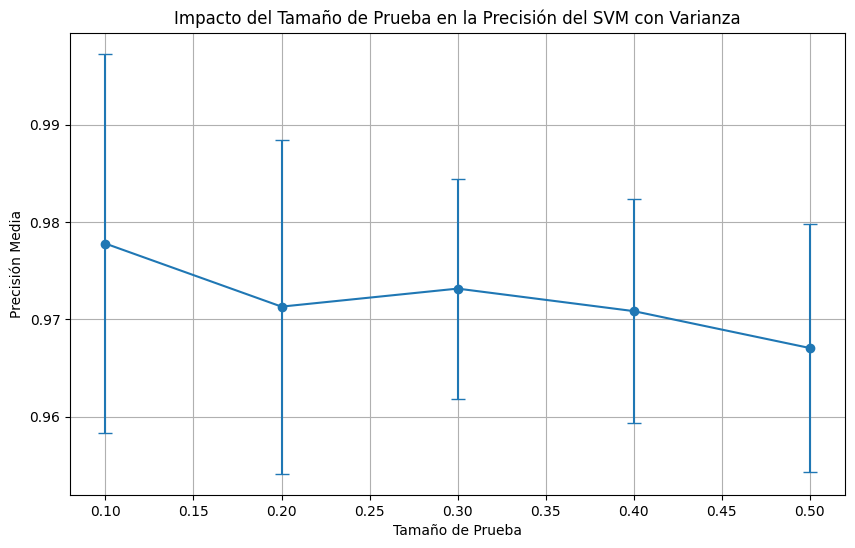

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definir diferentes tamaños de prueba para evaluar
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
num_iterations = 30  # Número de repeticiones por tamaño de prueba
svm_accuracies_all = {test_size: [] for test_size in test_sizes}  # Diccionario para almacenar las precisiones por tamaño de prueba

# Ejecutar experimentos para cada tamaño de prueba y calcular varianza
for test_size in test_sizes:
    for _ in range(num_iterations):
        # Dividir los datos con el tamaño de prueba especificado
        X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=test_size, random_state=None, stratify=y)
        
        # Entrenar el modelo SVM
        svm_model = make_pipeline(StandardScaler(), SVC())
        svm_model.fit(X_train, y_train)
        
        # Predecir y calcular precisión
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        svm_accuracies_all[test_size].append(accuracy)

# Calcular media y desviación estándar para cada tamaño de prueba
mean_accuracies = [np.mean(svm_accuracies_all[test_size]) for test_size in test_sizes]
std_accuracies = [np.std(svm_accuracies_all[test_size]) for test_size in test_sizes]

# Graficar precisión media con barras de error que representan la desviación estándar
plt.figure(figsize=(10, 6))
plt.errorbar(test_sizes, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5)
plt.title("Impacto del Tamaño de Prueba en la Precisión del SVM con Varianza")
plt.xlabel("Tamaño de Prueba")
plt.ylabel("Precisión Media")
plt.grid(True)
plt.show()


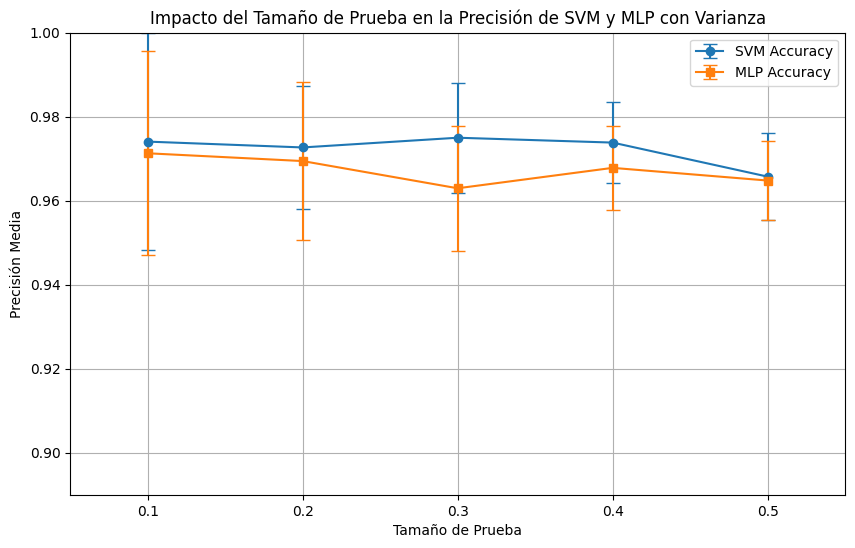

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definir diferentes tamaños de prueba para evaluar
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
num_iterations = 30  # Número de repeticiones por tamaño de prueba

# Diccionarios para almacenar las precisiones por tamaño de prueba para ambos modelos
svm_accuracies_all = {test_size: [] for test_size in test_sizes}
mlp_accuracies_all = {test_size: [] for test_size in test_sizes}

# Ejecutar experimentos para cada tamaño de prueba y calcular varianza
for test_size in test_sizes:
    for _ in range(num_iterations):
        # Dividir los datos con el tamaño de prueba especificado
        X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=test_size, random_state=None, stratify=y)
        
        # Entrenar y evaluar el modelo SVM
        svm_model = make_pipeline(StandardScaler(), SVC())
        svm_model.fit(X_train, y_train)
        y_pred_svm = svm_model.predict(X_test)
        svm_accuracies_all[test_size].append(accuracy_score(y_test, y_pred_svm))
        
        # Entrenar y evaluar el modelo MLP
        mlp_model = make_pipeline(StandardScaler(), MLPClassifier(max_iter=500, random_state=42))
        mlp_model.fit(X_train, y_train)
        y_pred_mlp = mlp_model.predict(X_test)
        mlp_accuracies_all[test_size].append(accuracy_score(y_test, y_pred_mlp))

# Calcular media y desviación estándar para cada tamaño de prueba y ambos modelos
mean_svm_accuracies = [np.mean(svm_accuracies_all[test_size]) for test_size in test_sizes]
std_svm_accuracies = [np.std(svm_accuracies_all[test_size]) for test_size in test_sizes]
mean_mlp_accuracies = [np.mean(mlp_accuracies_all[test_size]) for test_size in test_sizes]
std_mlp_accuracies = [np.std(mlp_accuracies_all[test_size]) for test_size in test_sizes]

# Graficar precisión media con barras de error que representan la desviación estándar para ambos modelos
plt.figure(figsize=(10, 6))
plt.errorbar(test_sizes, mean_svm_accuracies, yerr=std_svm_accuracies, fmt='-o', capsize=5, label='SVM Accuracy')
plt.errorbar(test_sizes, mean_mlp_accuracies, yerr=std_mlp_accuracies, fmt='-s', capsize=5, label='MLP Accuracy')
plt.title("Impacto del Tamaño de Prueba en la Precisión de SVM y MLP con Varianza")
plt.xlim(0.05, 0.55)
plt.ylim(0.89, 1)
plt.xlabel("Tamaño de Prueba")
plt.ylabel("Precisión Media")
plt.legend()
plt.grid(True)
plt.show()

# REPERESENTACIÓN 2D DE LA FRONTERA DE DECISIÓN

In [32]:
# TODO Realiar una representación grafica en 2d de la frontera de decisión de un clasificador 

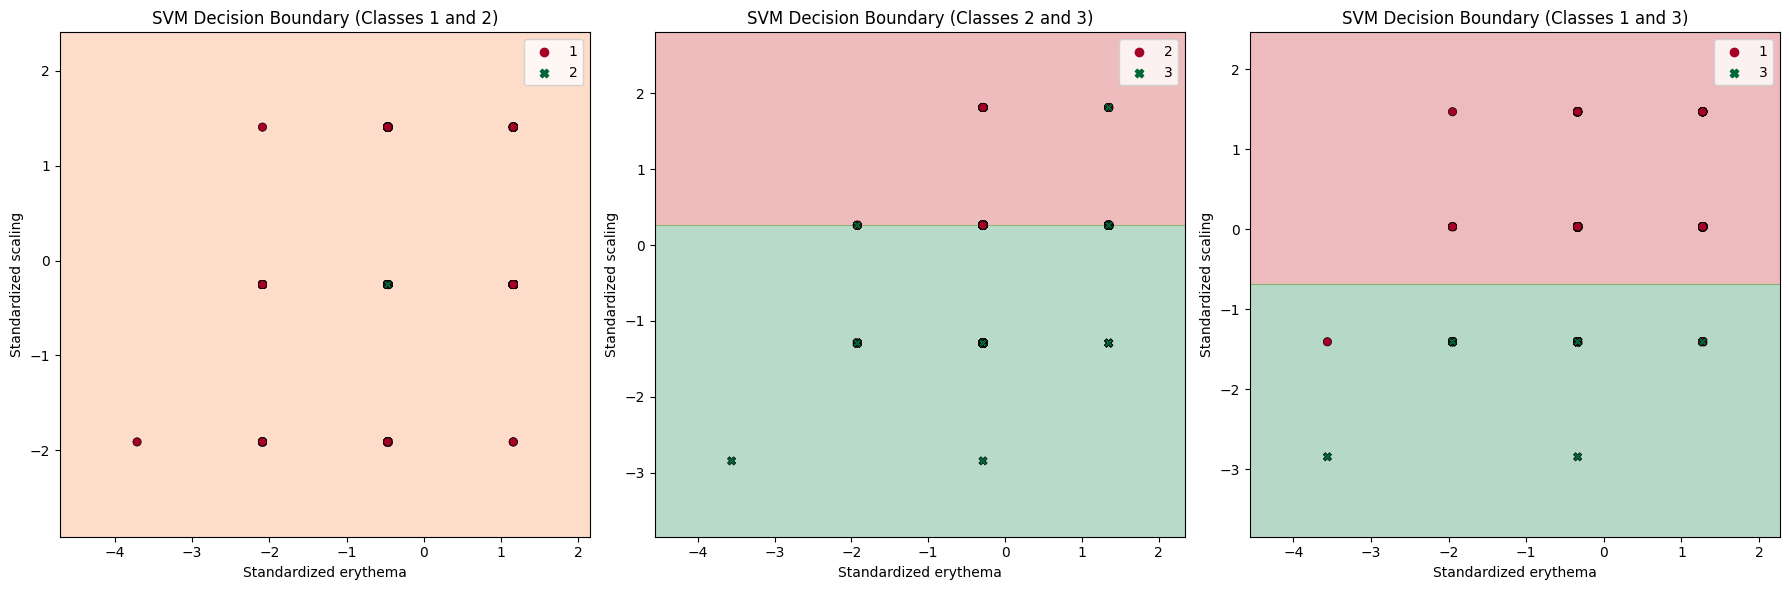

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


# Inicializar el escalador
scaler = StandardScaler()

# Función para trazar la frontera de decisión para cada par de clases
def plot_svm_decision_boundary_for_classes(class_pair, feature_1, feature_2, data, ax, title):
    # Filtrar el conjunto de datos para enfocarse en las dos clases seleccionadas
    subset_data = data[data['label'].isin(class_pair)]
    
    # Preparar datos para el SVM
    X = subset_data[[feature_1, feature_2]].values
    y = subset_data['label'].values
    
    # Estandarizar las características
    X_scaled = scaler.fit_transform(X)
    
    # Entrenar el modelo SVM con kernel lineal en el subconjunto de clases
    svm_model = SVC(kernel='linear', C=1).fit(X_scaled, y)
    
    # Definir los límites del gráfico
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predecir a través de la cuadrícula para obtener la frontera de decisión
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Trazar la frontera de decisión con los puntos de datos
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, style=y, palette='RdYlGn', ax=ax, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel(f"Standardized {feature_1}")
    ax.set_ylabel(f"Standardized {feature_2}")

# Crear la figura de mosaico
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Pares de clases y títulos correspondientes
class_pairs = [(1, 2), (2, 3), (1, 3)]
titles = ["Classes 1 and 2", "Classes 2 and 3", "Classes 1 and 3"]

# Aplicar la función a cada par de clases y subgráfico
for i, (pair, title) in enumerate(zip(class_pairs, titles)):
    plot_svm_decision_boundary_for_classes(pair, 'erythema', 'scaling', df, axs[i], f"SVM Decision Boundary ({title})")

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


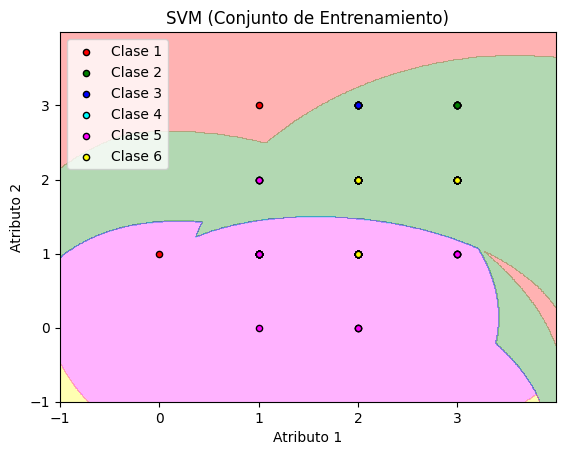

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Supongamos que ya tienes tu SVM entrenado llamado 'svm_classifier'
# y que tienes un scaler llamado 'scaler' si aplicaste escalado a tus datos.

# Selección de dos características para la visualización
# Por ejemplo, seleccionemos el primer y segundo atributo.
# Cambia los índices según las características que desees visualizar.
feature_1 = 0
feature_2 = 1

# Obtener las medias de las otras características para fijarlas
if X_train.shape[1] > 2:
    fixed_features = np.mean(X_train[:, 2:], axis=0)
else:
    fixed_features = np.array([])  # No hay características adicionales

# Crear una malla de puntos para la visualización
x_min, x_max = X_train[:, feature_1].min() - 1, X_train[:, feature_1].max() + 1
y_min, y_max = X_train[:, feature_2].min() - 1, X_train[:, feature_2].max() + 1
X1, X2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Preparar los puntos de la malla para la predicción
# Para cada punto en la malla, combinamos las dos características seleccionadas
# con los valores fijos de las demás características
grid_points = np.c_[X1.ravel(), X2.ravel()]

if X_train.shape[1] > 2:
    # Crear una matriz de las características fijas
    fixed_part = np.tile(fixed_features, (grid_points.shape[0], 1))
    # Combinar las dos características con las características fijas
    grid_points_full = np.hstack((grid_points, fixed_part))
else:
    grid_points_full = grid_points

# Si aplicaste escalado a los datos, escalar los puntos de la malla
# Asegúrate de que 'scaler' está definido y entrenado previamente
# Si no usaste escalado, puedes omitir esta parte
# grid_points_scaled = scaler.transform(grid_points_full)
# Z = svm_classifier.predict(grid_points_scaled)

# Si no usaste escalado:
Z = svm_model.predict(grid_points_full)

# Reshape de las predicciones para que coincidan con la malla
Z = Z.reshape(X1.shape)

# Definir un mapa de colores con al menos 6 colores para las 6 clases
cmap = ListedColormap(['red', 'green', 'blue', 'cyan', 'magenta', 'yellow'])

# Graficar el límite de decisión
plt.contourf(X1, X2, Z, alpha=0.3, cmap=cmap)

# Configurar los límites de los ejes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
# Asegúrate de que 'y_train' tenga valores entre 0 y 5 para las 6 clases
for i, class_label in enumerate(np.unique(y_train)):
    plt.scatter(
        X_train[y_train == class_label, feature_1], 
        X_train[y_train == class_label, feature_2],
        c=[cmap(i)], 
        label=f'Clase {class_label}',
        edgecolor='k',
        s=20
    )

# Añadir títulos y etiquetas
plt.title('SVM (Conjunto de Entrenamiento)')
plt.xlabel('Atributo {}'.format(feature_1 + 1))  # Ajusta según el nombre real
plt.ylabel('Atributo {}'.format(feature_2 + 1))  # Ajusta según el nombre real
plt.legend()
plt.show()


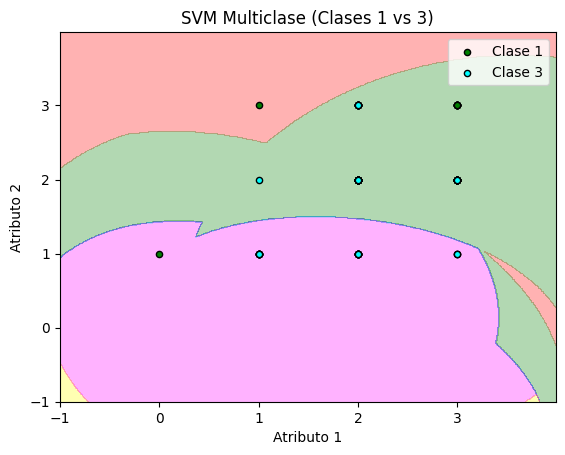

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Supongamos que ya tienes tu SVM multiclase entrenado llamado 'svm_classifier'
# y que tienes tus datos X_train y y_train definidos

# 1. Seleccionar las dos clases que deseas visualizar
class_a = 1  # Primera clase de interés
class_b = 3  # Segunda clase de interés

# 2. Seleccionar dos características para la visualización
feature_1 = 0  # Índice de la primera característica
feature_2 = 1  # Índice de la segunda característica

# 3. Calcular las medias de las otras características para fijarlas
if X_train.shape[1] > 2:
    fixed_features = np.mean(X_train[:, 2:], axis=0)
else:
    fixed_features = np.array([])  # No hay características adicionales

# 4. Crear una malla de puntos para la visualización
x_min, x_max = X_train[:, feature_1].min() - 1, X_train[:, feature_1].max() + 1
y_min, y_max = X_train[:, feature_2].min() - 1, X_train[:, feature_2].max() + 1
X1, X2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 5. Preparar los puntos de la malla para la predicción
grid_points = np.c_[X1.ravel(), X2.ravel()]

if X_train.shape[1] > 2:
    # Repetir las características fijas para cada punto de la malla
    fixed_part = np.tile(fixed_features, (grid_points.shape[0], 1))
    # Concatenar las dos características variables con las características fijas
    grid_points_full = np.hstack((grid_points, fixed_part))
else:
    grid_points_full = grid_points

# 6. Si aplicaste escalado, aplica el mismo escalado a grid_points_full
# Suponiendo que tienes un objeto 'scaler' que ya está ajustado
# grid_points_full_scaled = scaler.transform(grid_points_full)

# 7. Realizar la predicción usando el SVM multiclase existente
# Si usas escalado:
# Z = svm_classifier.predict(grid_points_full_scaled)
# Si no usas escalado:
Z = svm_model.predict(grid_points_full)

Z = Z.reshape(X1.shape)

# 8. Definir el mapa de colores con al menos 6 colores para las 6 clases
cmap = ListedColormap(['red', 'green', 'blue', 'cyan', 'magenta', 'yellow'])

# 9. Graficar el límite de decisión
plt.contourf(X1, X2, Z, alpha=0.3, cmap=cmap)

# 10. Configurar los límites de los ejes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 11. Graficar los puntos de entrenamiento de las dos clases seleccionadas
for i, class_label in enumerate([class_a, class_b]):
    plt.scatter(
        X_train[y_train == class_label, feature_1],
        X_train[y_train == class_label, feature_2],
        c=[cmap(class_label)],
        label=f'Clase {class_label}',
        edgecolor='k',
        s=20
    )

# 12. Añadir títulos y etiquetas
plt.title(f'SVM Multiclase (Clases {class_a} vs {class_b})')
plt.xlabel(f'Atributo {feature_1 + 1}')
plt.ylabel(f'Atributo {feature_2 + 1}')
plt.legend()
plt.show()


In [36]:
from sklearn.decomposition import PCA
# Reducir la dimensionalidad a 2D con PCA
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_all)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_pca)

print(f"Explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.2f}")

# Dividir los datos
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenar SVM en 2D
svm_pca = SVC(kernel='linear', C=1, probability=True, random_state=42)
svm_pca.fit(X_train_pca, y_train_pca)

# Evaluar el modelo
train_acc_pca = svm_pca.score(X_train_pca, y_train_pca)
test_acc_pca = svm_pca.score(X_test_pca, y_test_pca)

print(f"Precisión en entrenamiento (PCA): {train_acc_pca:.2f}")
print(f"Precisión en prueba (PCA): {test_acc_pca:.2f}")


Explained variance by 2 components: 0.44
Precisión en entrenamiento (PCA): 0.82
Precisión en prueba (PCA): 0.79


# REPRESENTACIÓN DE LAS FORNTERAS DE DECISÓN
vamos a visualizar la representación de las diferentes fornteras de decisón

## representación de todas las fronteras de nuestro dataset combinadas


In [37]:
# Visualizar la frontera de decisión en 2D
from matplotlib.colors import ListedColormap

# Definir el rango de la malla
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
h = 0.02  # Resolución de la malla

# Crear la malla de puntos
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecir la clase para cada punto en la malla
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


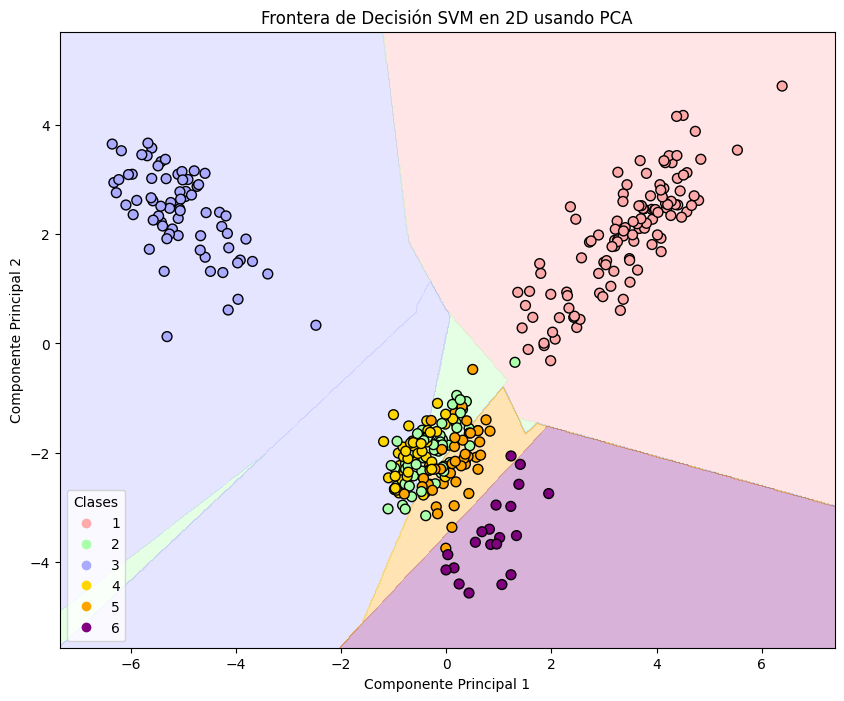

In [38]:
# Definir colores para las clases
unique_classes = np.unique(y)
colors = ['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700', '#FFA500', '#800080']
cmap_light = ListedColormap(colors[:len(unique_classes)])
cmap_bold = ListedColormap(colors[:len(unique_classes)])

# Crear el gráfico
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Dibujar los puntos de datos
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)

# Añadir etiquetas y título
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Frontera de Decisión SVM en 2D usando PCA')

# Crear una leyenda
handles, _ = scatter.legend_elements()
plt.legend(handles, unique_classes, title="Clases")

plt.show()

Sabemos que nuestro dataset tiene 6 clases diferetnes y 34 atributos
Vamos a elegir pares de clases apra visualizar la forntera relativa a ese par de clases

Vamos a transformar nuestro dataset de 6 clases en binario para poder implementar las fornteras de decisón de cada par de clases

In [42]:
from itertools import combinations
import math

def plot_svm_decision_boundary(df, clase_a, clase_b, caract_cols, ax=None):
    """
    Filtra el DataFrame para dos clases, aplica estandarización y PCA,
    entrena un SVM y grafica la frontera de decisión.
    
    Parameters:
    - df: pandas DataFrame que contiene los datos.
    - clase_a: etiqueta de la primera clase.
    - clase_b: etiqueta de la segunda clase.
    - caract_cols: lista de nombres de columnas que son características.
    - ax: objeto Axes de matplotlib para graficar (opcional).
    
    Returns:
    - ax: objeto Axes con el gráfico.
    - accuracy_train: precisión en entrenamiento.
    - accuracy_test: precisión en prueba.
    """
    # Paso 1: Filtrar las dos clases de interés
    df_binario = df[df['label'].isin([clase_a, clase_b])].copy()
    
    # Paso 2: Separar características y etiquetas
    X_binario = df_binario[caract_cols].values
    y_binario = df_binario['label'].values
    
    # Paso 3: Estandarizar los datos
    scaler_local = StandardScaler()
    X_scaled_binario = scaler_local.fit_transform(X_binario)
    
    # Paso 4: Aplicar PCA para reducir a 2 dimensiones
    pca_local = PCA(n_components=2, random_state=42)
    X_pca_binario = pca_local.fit_transform(X_scaled_binario)
    
    # Paso 5: Dividir los datos en entrenamiento y prueba
    X_train_binario, X_test_binario, y_train_binario, y_test_binario = train_test_split(
        X_pca_binario, y_binario, test_size=0.3, random_state=42, stratify=y_binario
    )
    
    # Paso 6: Entrenar el modelo SVM con kernel lineal
    svm_binario = SVC(kernel='linear', C=1, probability=True, random_state=42)
    svm_binario.fit(X_train_binario, y_train_binario)
    
    # Paso 7: Evaluar el modelo
    train_accuracy_binario = svm_binario.score(X_train_binario, y_train_binario)
    test_accuracy_binario = svm_binario.score(X_test_binario, y_test_binario)
    
    # Paso 8: Definir el rango de la malla
    x_min, x_max = X_pca_binario[:, 0].min() - 1, X_pca_binario[:, 0].max() + 1
    y_min, y_max = X_pca_binario[:, 1].min() - 1, X_pca_binario[:, 1].max() + 1
    h = 0.02  # Resolución de la malla
    
    # Paso 9: Crear la malla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Paso 10: Predecir la clase para cada punto en la malla
    Z = svm_binario.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Paso 11: Definir colores para las clases
    unique_classes = [clase_a, clase_b]
    colors = ['#FFAAAA', '#AAFFAA']  # Colores para las dos clases
    cmap_light = ListedColormap(colors)
    cmap_bold = ListedColormap(['red', 'green'])
    
    # Paso 12: Crear el gráfico si no se proporciona un objeto Axes
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Paso 13: Graficar la frontera de decisión
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    
    # Paso 14: Dibujar los puntos de datos
    scatter = ax.scatter(X_pca_binario[:, 0], X_pca_binario[:, 1], 
                         c=y_binario, cmap=cmap_bold, edgecolor='k', s=50)
    
    # Paso 15: Añadir etiquetas y título
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_title(f'Frontera de Decisión SVM entre Clases {clase_a} y {clase_b}')
    
    # Paso 16: Crear una leyenda
    handles, _ = scatter.legend_elements()
    ax.legend(handles, [f"Clase {clase_a}", f"Clase {clase_b}"], title="Clases")
    
    # Paso 17: Retornar el objeto Axes y las precisiones
    return ax, train_accuracy_binario, test_accuracy_binario




ahora vamos a mostrar las fornteras de decisión de nustros pares de clases


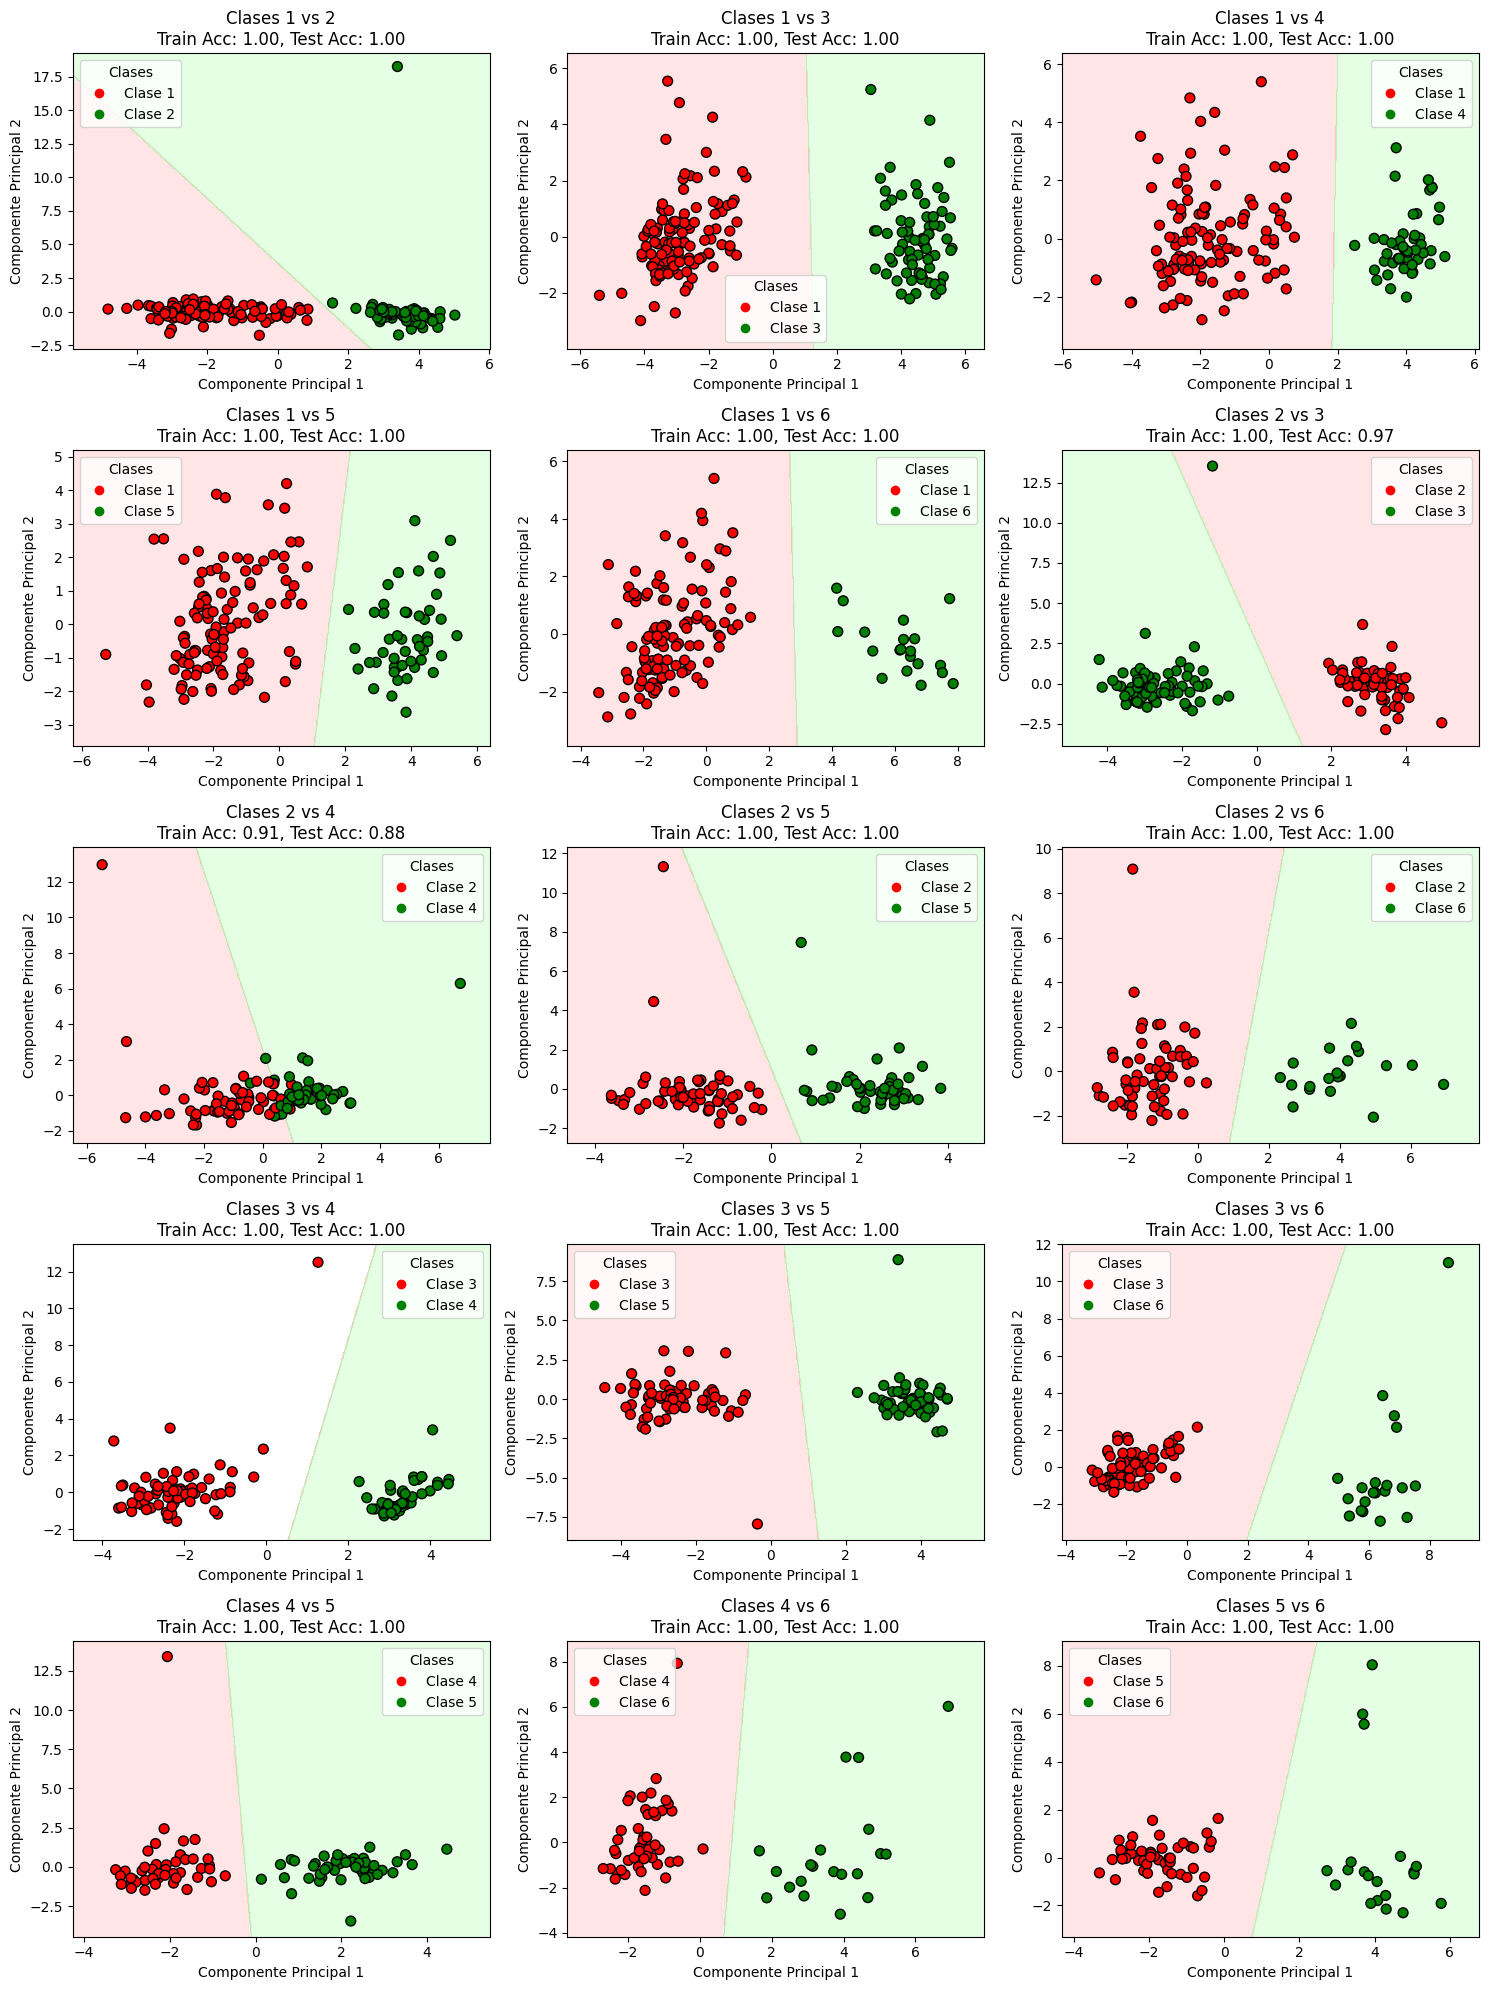

In [ ]:
from itertools import combinations

# Paso 1: Definir los pares de clases que deseas visualizar
clases = sorted(df['label'].unique())
pares_de_clases = list(combinations(clases, 2))


# Paso 2: Definir las columnas de características
caract_cols_binario = [col for col in df.columns if col != 'label']

# Paso 3: Configurar el número de subplots
num_pares = len(pares_de_clases)
num_columnas = 3  # Ajusta según tus preferencias
num_filas = math.ceil(num_pares / num_columnas)

# Paso 4: Crear la figura con subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(5*num_columnas, 4*num_filas))
axes = axes.flatten()  # Aplanar para facilitar la iteración

# Paso 5: Iterar sobre cada par de clases y graficar
for idx, (clase_a, clase_b) in enumerate(pares_de_clases):
    ax = axes[idx] if idx < len(axes) else None  # Verificar que no exceda
    if ax is not None:
        ax, acc_train, acc_test = plot_svm_decision_boundary(df, clase_a, clase_b, caract_cols_binario, ax=ax)
        # Opcional: Mostrar las precisiones en el título
        ax.set_title(f'Clases {clase_a} vs {clase_b}\nTrain Acc: {acc_train:.2f}, Test Acc: {acc_test:.2f}')
    else:
        print(f"No hay suficiente espacio para el par {clase_a} vs {clase_b}")

# Paso 6: Eliminar subplots vacíos si los hay
for idx in range(len(pares_de_clases), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()




podemos observar las diferentes fronteras de decision para cada uno de los pares de clases seleccionados 